In [7]:
import pandas as pd
df = pd.read_csv(r"C:\Users\34616\Documents\4GEEKS\datos_gordos\roBERTa results\final_version\ultimate_df.csv")
df.head()

,Unnamed: 0,text,subreddit,label,sentiment,score
0,6469,"Same, the main reason being that there would b...",politics,Democrat,LABEL_0,0.484975
1,6473,"I was against it until the debate, and then I ...",politics,Republican,LABEL_0,0.483774
2,6474,Same. At least we can admit it. Now let's go t...,politics,Republican,LABEL_0,0.908691
3,6476,"In fairness, I wanted Biden to step aside but ...",politics,Democrat,LABEL_1,0.481510
4,6477,Same. Not in the sense that I didn’t think Bid...,politics,Democrat,LABEL_1,0.514487


In [8]:
import pandas as pd

# Adjust the label column: Assuming LABEL_0, LABEL_1, LABEL_2 correspond to negative, neutral, positive
def adjust_labels(df):
    label_map = {'LABEL_0': 'negative', 'LABEL_1': 'neutral', 'LABEL_2': 'positive'}
    df['sentiment'] = df['sentiment'].map(label_map)
    return df

# Assuming your dataframe is called df
df = adjust_labels(df)

# Now let's move to the analysis.


In [9]:
df.head()

,Unnamed: 0,text,subreddit,label,sentiment,score
0,6469,"Same, the main reason being that there would b...",politics,Democrat,negative,0.484975
1,6473,"I was against it until the debate, and then I ...",politics,Republican,negative,0.483774
2,6474,Same. At least we can admit it. Now let's go t...,politics,Republican,negative,0.908691
3,6476,"In fairness, I wanted Biden to step aside but ...",politics,Democrat,neutral,0.481510
4,6477,Same. Not in the sense that I didn’t think Bid...,politics,Democrat,neutral,0.514487


In [10]:
df = df.drop('Unnamed: 0', axis=1)

In [12]:
df = df.drop_duplicates()
df.shape

(173228, 5)

C:\Users\34616\AppData\Local\Temp\ipykernel_16608\931927098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


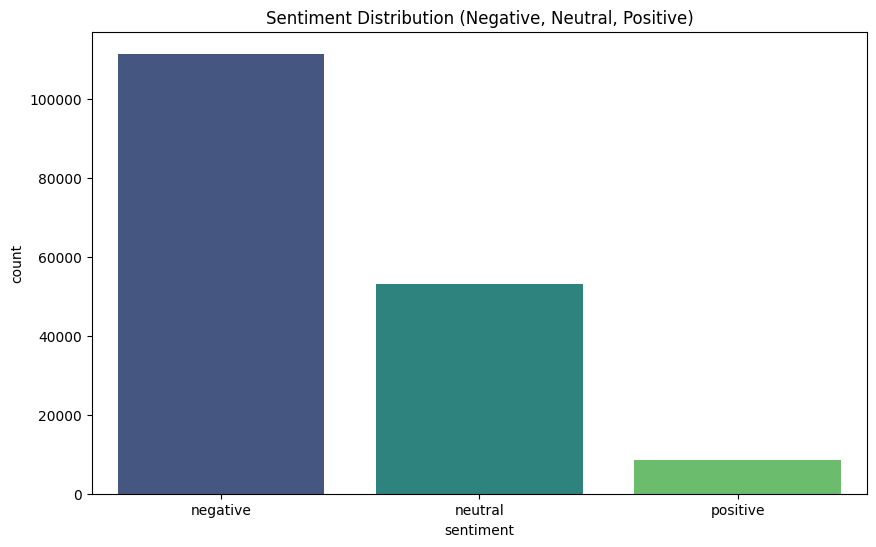

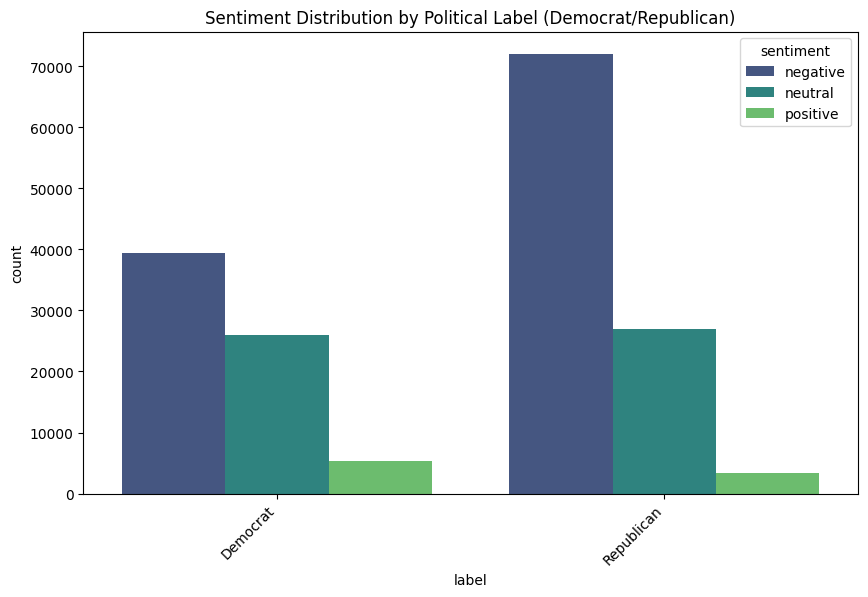

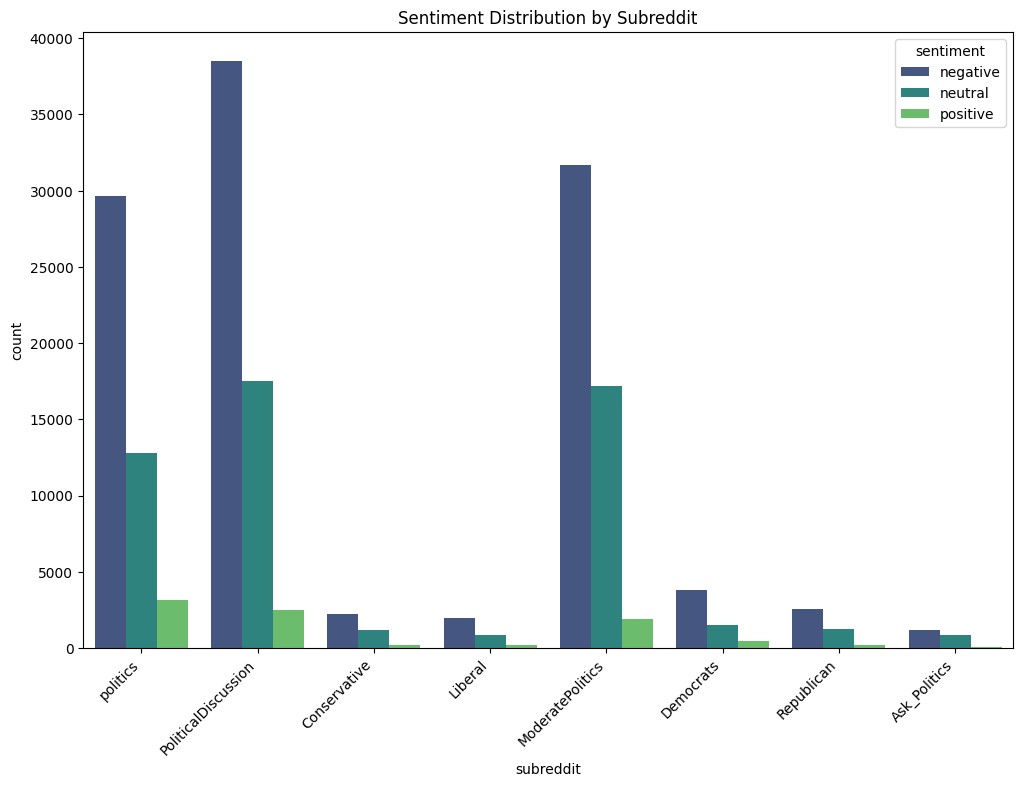

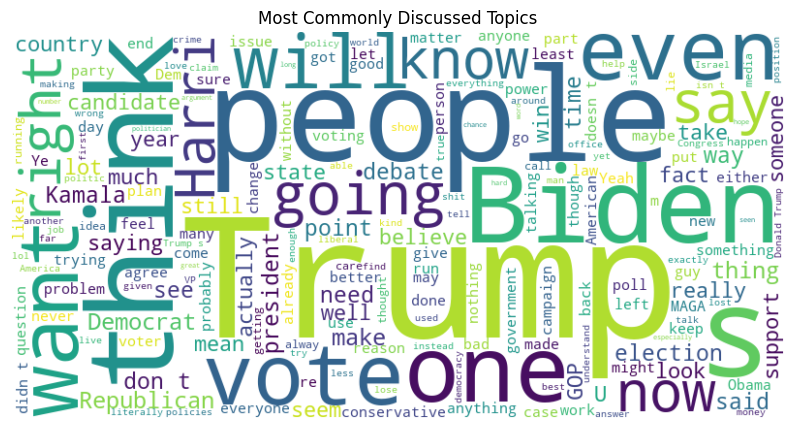

C:\Users\34616\AppData\Local\Temp\ipykernel_16608\931927098.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_score_per_subreddit.index, y=avg_score_per_subreddit.values, palette='coolwarm')


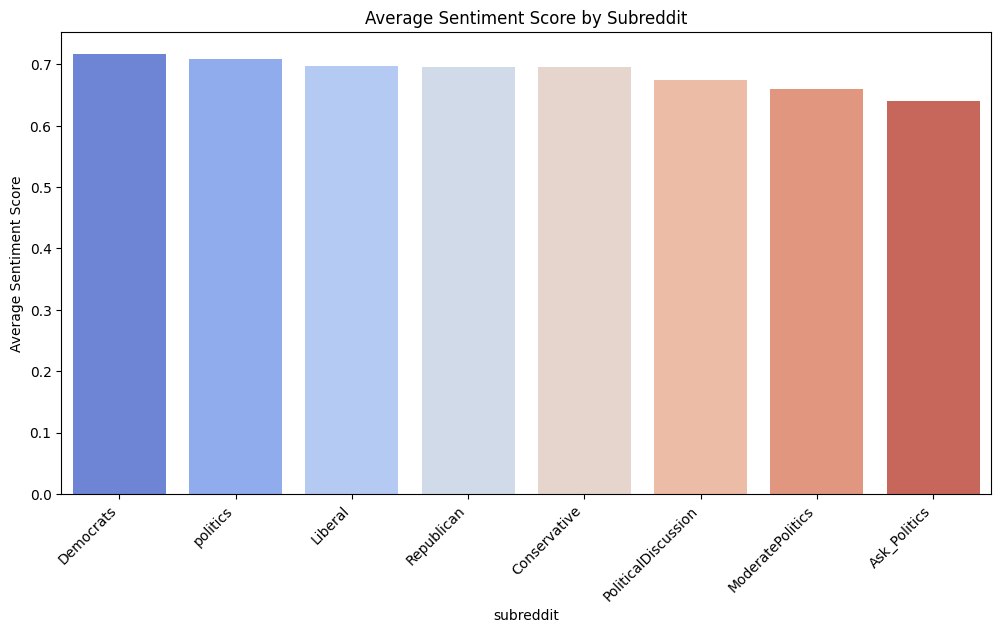

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Distribution of sentiment across the entire dataset
def plot_distribution(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(title)
    plt.show()


# 1. Distribution of sentiment across the entire dataset
plot_distribution(df, 'sentiment', 'Sentiment Distribution (Negative, Neutral, Positive)')

# 2. Sentiment distribution by political label (Democrat, Republican)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', hue='sentiment', palette='viridis')
plt.title('Sentiment Distribution by Political Label (Democrat/Republican)')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Sentiment distribution by subreddit
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='subreddit', hue='sentiment', palette='viridis')
plt.title('Sentiment Distribution by Subreddit')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Most commonly discussed topics (WordCloud)
text_data = ' '.join(df['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Commonly Discussed Topics')
plt.show()

# 5. Comparison of average sentiment scores across subreddits

if 'score' in df.columns:
    avg_score_per_subreddit = df.groupby('subreddit')['score'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_score_per_subreddit.index, y=avg_score_per_subreddit.values, palette='coolwarm')
    plt.title('Average Sentiment Score by Subreddit')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Average Sentiment Score')
    plt.show()


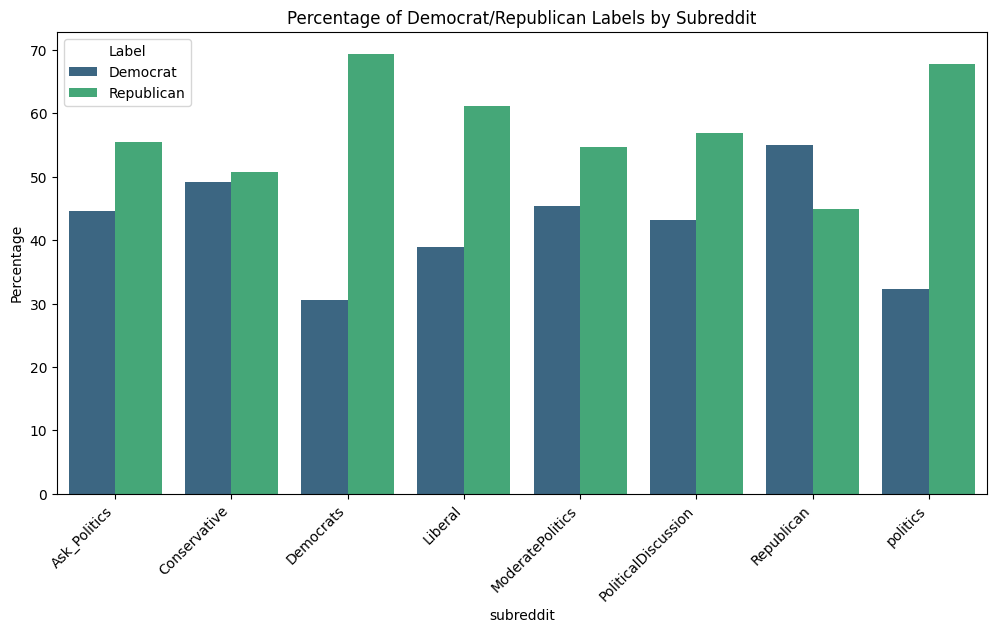

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of each label (Democrat/Republican) per subreddit
def calculate_label_percentages(df):
    subreddit_label_counts = df.groupby(['subreddit', 'label']).size().reset_index(name='count')
    subreddit_total_counts = df.groupby('subreddit').size().reset_index(name='total')
    
    # Merge to get the total counts for each subreddit
    merged = pd.merge(subreddit_label_counts, subreddit_total_counts, on='subreddit')
    
    # Calculate percentage
    merged['percentage'] = (merged['count'] / merged['total']) * 100
    return merged

def plot_label_distribution_by_subreddit(df):
    # Calculate the percentage data
    percentage_data = calculate_label_percentages(df)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=percentage_data, x='subreddit', y='percentage', hue='label', palette='viridis')
    
    plt.title('Percentage of Democrat/Republican Labels by Subreddit')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Label')
    plt.show()

# Assuming your dataframe is called df
plot_label_distribution_by_subreddit(df)


C:\Users\34616\AppData\Local\Temp\ipykernel_16608\2787743254.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='viridis')


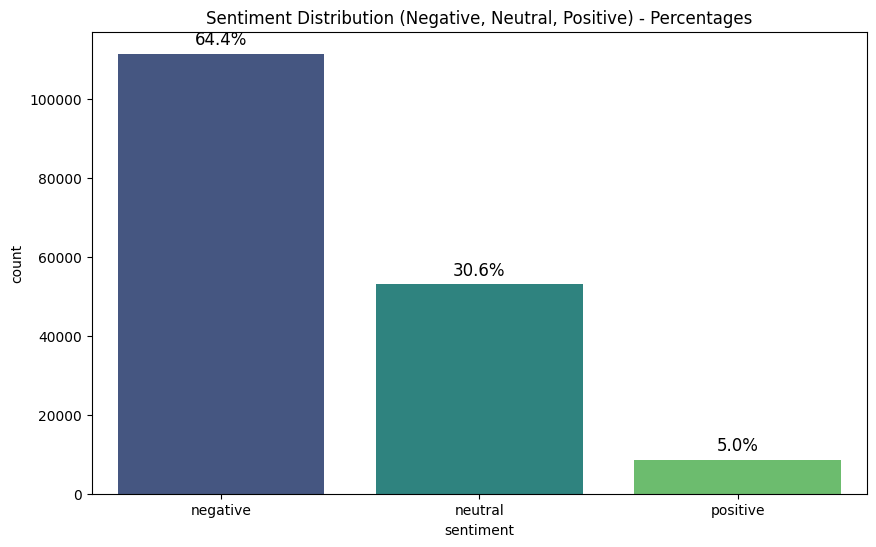

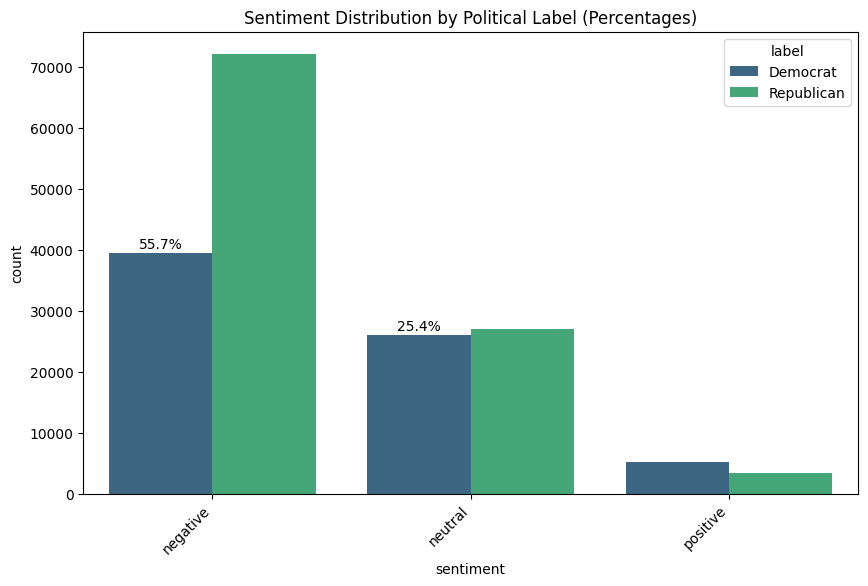

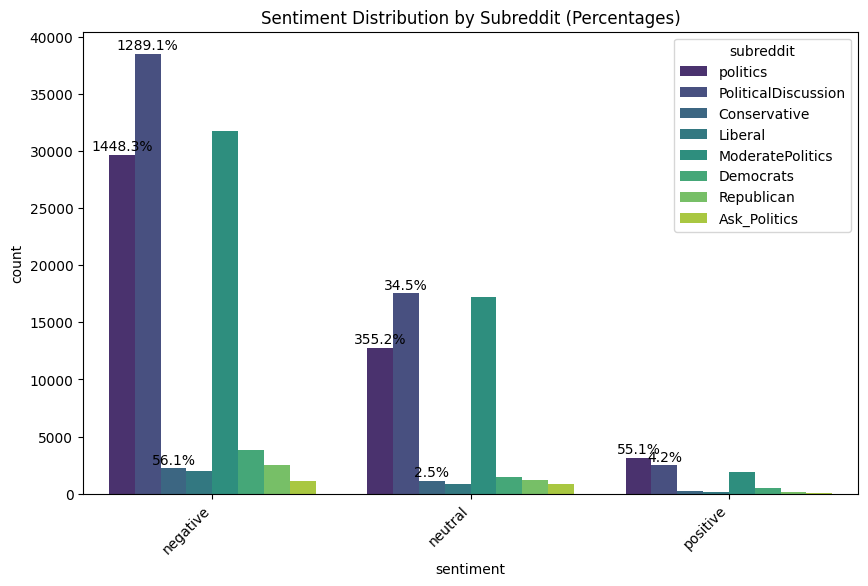

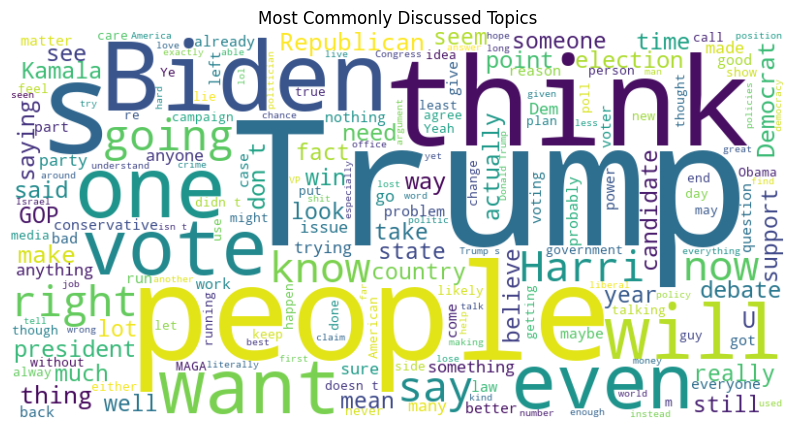

C:\Users\34616\AppData\Local\Temp\ipykernel_16608\2787743254.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_score_per_subreddit.index, y=avg_score_per_subreddit.values, palette='coolwarm')


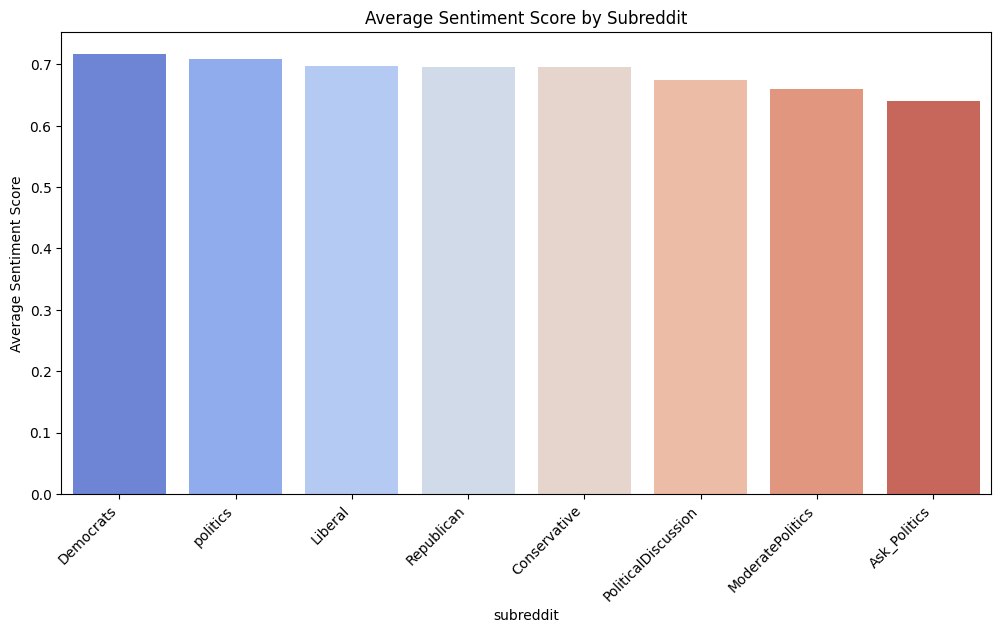

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Helper function to plot percentages
def plot_percentage_distribution(df, column, title):
    plt.figure(figsize=(10, 6))
    total = len(df)
    ax = sns.countplot(data=df, x=column, palette='viridis')

    # Calculate percentages
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')

    plt.title(title)
    plt.show()

# Helper function to plot percentages with hue
def plot_percentage_distribution_with_hue(df, column, hue, title):
    plt.figure(figsize=(10, 6))
    total_per_hue = df.groupby(hue)[column].count().values
    ax = sns.countplot(data=df, x=column, hue=hue, palette='viridis')

    # Calculate percentages for each hue
    for p, total in zip(ax.patches, total_per_hue):
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                    textcoords='offset points')

    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()



# 1. Sentiment distribution (percentages)
plot_percentage_distribution(df, 'sentiment', 'Sentiment Distribution (Negative, Neutral, Positive) - Percentages')

# 2. Sentiment distribution by political label (percentages by Democrat/Republican)
plot_percentage_distribution_with_hue(df, 'sentiment', 'label', 'Sentiment Distribution by Political Label (Percentages)')

# 3. Sentiment distribution by subreddit (percentages)
plot_percentage_distribution_with_hue(df, 'sentiment', 'subreddit', 'Sentiment Distribution by Subreddit (Percentages)')

# 4. Most commonly discussed topics (WordCloud)
text_data = ' '.join(df['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Commonly Discussed Topics')
plt.show()

# 5. Average sentiment scores across subreddits 
if 'score' in df.columns:
    avg_score_per_subreddit = df.groupby('subreddit')['score'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_score_per_subreddit.index, y=avg_score_per_subreddit.values, palette='coolwarm')
    plt.title('Average Sentiment Score by Subreddit')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Average Sentiment Score')
    plt.show()


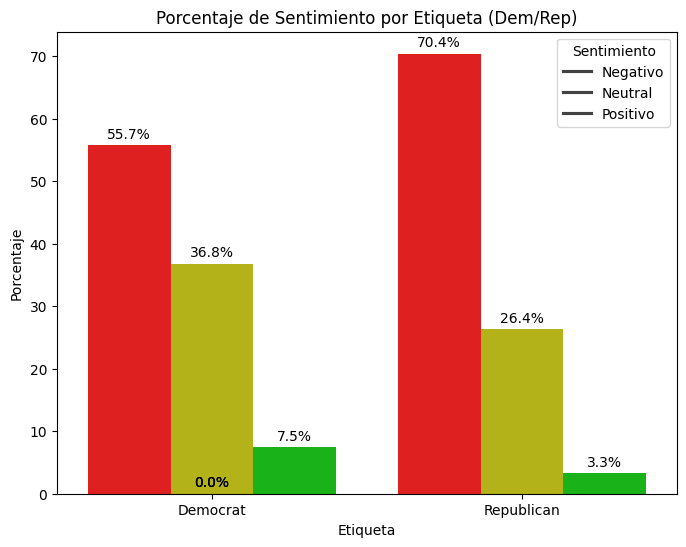

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of sentiment (positive, neutral, negative) for each label (Democrat/Republican)
def calculate_sentiment_percentages(df):
    label_sentiment_counts = df.groupby(['label', 'sentiment']).size().reset_index(name='count')
    label_total_counts = df.groupby('label').size().reset_index(name='total')
    
    # Merge to get the total counts for each label
    merged = pd.merge(label_sentiment_counts, label_total_counts, on='label')
    
    # Calculate percentage
    merged['percentage'] = (merged['count'] / merged['total']) * 100
    return merged

def plot_sentiment_distribution_by_label(df):
    # Make sure sentiment labels are consistent (capitalize them)
    df['sentiment'] = df['sentiment'].str.capitalize()

    # Calculate the percentage data
    percentage_data = calculate_sentiment_percentages(df)

    plt.figure(figsize=(8, 6))
    
    # Set color palette for sentiment
    sentiment_palette = {'Positive': '#00CC00', 'Neutral': '#CCCC00', 'Negative': '#FF0000'}
    
    # Create barplot
    barplot = sns.barplot(data=percentage_data, x='label', y='percentage', hue='sentiment', palette=sentiment_palette)

    # Annotate each bar with the percentage value
    for p in barplot.patches:
        barplot.annotate(f'{p.get_height():.1f}%', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='baseline', fontsize=10, color='black', 
                         xytext=(0, 5), textcoords='offset points')
    
    plt.title('Porcentaje de Sentimiento por Etiqueta (Dem/Rep)')
    plt.ylabel('Porcentaje')
    plt.xlabel('Etiqueta')
    plt.xticks(rotation=0)
    plt.legend(title='Sentimiento', labels=['Negativo', 'Neutral', 'Positivo'])
    plt.show()

# Assuming your dataframe is called df
plot_sentiment_distribution_by_label(df)




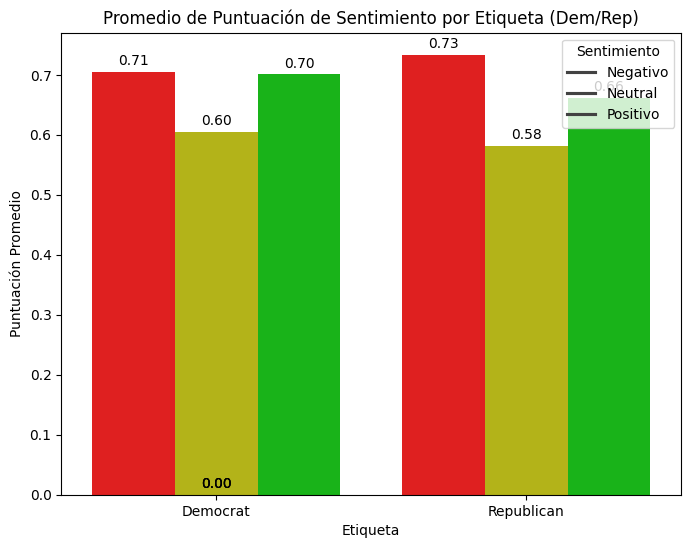

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average sentiment score for each sentiment for Democrats and Republicans
def calculate_avg_sentiment_score(df):
    # Group by label (Democrat/Republican) and sentiment (Negative, Neutral, Positive)
    avg_scores = df.groupby(['label', 'sentiment'])['score'].mean().reset_index()
    return avg_scores

def plot_avg_sentiment_score(df):
    # Make sure sentiment labels are consistent (capitalize them)
    df['sentiment'] = df['sentiment'].str.capitalize()

    # Calculate average sentiment score data
    avg_score_data = calculate_avg_sentiment_score(df)

    plt.figure(figsize=(8, 6))
    
    # Set color palette for sentiment
    sentiment_palette = {'Positive': '#00CC00', 'Neutral': '#CCCC00', 'Negative': '#FF0000'}
    
    # Create barplot
    barplot = sns.barplot(data=avg_score_data, x='label', y='score', hue='sentiment', palette=sentiment_palette)

    # Annotate each bar with the average score value
    for p in barplot.patches:
        barplot.annotate(f'{p.get_height():.2f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='baseline', fontsize=10, color='black', 
                         xytext=(0, 5), textcoords='offset points')
    
    plt.title('Promedio de Puntuación de Sentimiento por Etiqueta (Dem/Rep)')
    plt.ylabel('Puntuación Promedio')
    plt.xlabel('Etiqueta')
    plt.xticks(rotation=0)
    plt.legend(title='Sentimiento', labels=['Negativo', 'Neutral', 'Positivo'])
    plt.show()

plot_avg_sentiment_score(df)
